In [1]:
import numpy as np
import pandas as pd
#from sklearn.ensemble import RandomForestClassifier
import datetime
import matplotlib.pyplot as plt

In [2]:
#%load_ext tensorboard

In [ ]:
import tensorflow as tf

In [ ]:
import os

In [5]:
print(tf.__version__)

2.1.0


In [6]:
from tensorflow import keras

In [7]:
raw_train_data = pd.read_csv('train_MINST.csv/train.csv')
raw_train_data.head()

test_data = pd.read_csv('test_MINST.csv/test.csv')


In [8]:
y_train = raw_train_data.label
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [9]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train = raw_train_data.loc[:,'pixel0':]
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_train.shape

(42000, 784)

In [12]:
test_data.shape

(28000, 784)

In [13]:
X_traintest = pd.concat([X_train,test_data],ignore_index=True)
X_traintest.shape

(70000, 784)

In [14]:
max(X_traintest.describe().loc['max'])

255.0

In [15]:
raw_train_data.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [16]:
X_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 418.7 MB


In [17]:
X_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 418.7 MB


In [18]:
np.reshape(X_train.loc[0,:].values,(-1,28,28))

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,
           0,   0,   0

In [19]:
np.sqrt(784)

28.0

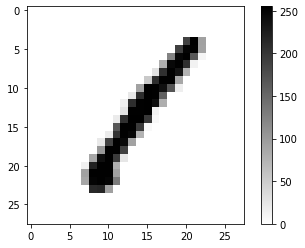

In [20]:
plt.figure()
plt.imshow(np.reshape(X_train.loc[0,:].values,(28,28)),cmap='gray_r')
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
# Normalize the data
X_train = X_train/255
X_test = test_data/255

In [22]:
# Reshape image in 3 dimensions 28,28,1)
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [23]:
X_train.shape

(42000, 28, 28, 1)

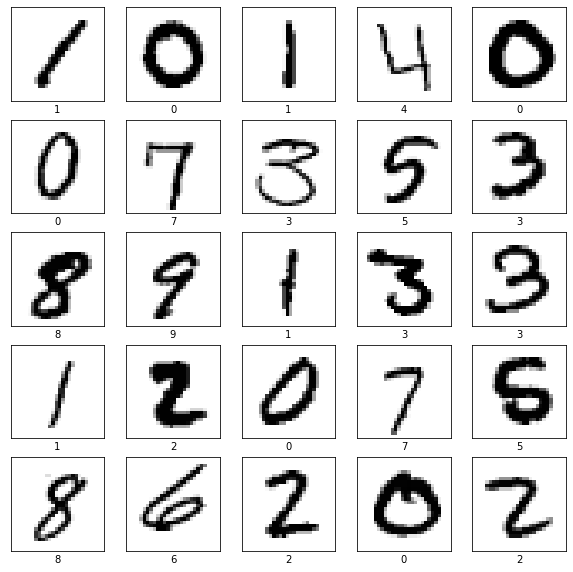

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #print(np.ravel(X_train[i]))
    plt.imshow(np.reshape(a=np.ravel(X_train[i]),newshape=(28,28),order='C'), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [25]:
X_train.shape

(42000, 28, 28, 1)

In [26]:
start=datetime.datetime.now()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(20, activation ='relu'),
    keras.layers.Dense(20, activation ='relu'),
    keras.layers.Dense(20, activation ='relu'),
    keras.layers.Dense(20, activation ='relu'),
    keras.layers.Dense(10)
])
end=datetime.datetime.now()
print(end-start)

0:00:00.137385


In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
#%load_ext tensorboard

In [29]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
os.makedirs(logdir, exist_ok =True)
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [30]:
start=datetime.datetime.now()
model.fit(X_train,y_train,epochs =50,callbacks=[tensorboard_callback])
end=datetime.datetime.now()

Train on 42000 samples
Epoch 1/50
42000/42000 [==============================] - 3s 83us/sample - loss: 0.5216 - accuracy: 0.8410
Epoch 2/50
42000/42000 [==============================] - 3s 65us/sample - loss: 0.2556 - accuracy: 0.9261
Epoch 3/50
42000/42000 [==============================] - 3s 60us/sample - loss: 0.2101 - accuracy: 0.9370
Epoch 4/50
42000/42000 [==============================] - 2s 59us/sample - loss: 0.1805 - accuracy: 0.9468
Epoch 5/50
42000/42000 [==============================] - 3s 60us/sample - loss: 0.1625 - accuracy: 0.9517
Epoch 6/50
42000/42000 [==============================] - 2s 59us/sample - loss: 0.1501 - accuracy: 0.9552
Epoch 7/50
42000/42000 [==============================] - 3s 61us/sample - loss: 0.1373 - accuracy: 0.9578
Epoch 8/50
42000/42000 [==============================] - 3s 61us/sample - loss: 0.1285 - accuracy: 0.9604
Epoch 9/50
42000/42000 [==============================] - 3s 61us/sample - loss: 0.1187 - accuracy: 0.9638
Epoch 10/50
42

In [31]:
print(end-start)

0:02:17.495904


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
Total params: 17,170
Trainable params: 17,170
Non-trainable params: 0
____________________________________________________

In [33]:
#%load_ext tensorboard

In [34]:
#%tensorboard --logdir {logdir}

In [35]:
# save_dir = "/results/"
# model_name = 'keras_mnist.h5'
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)

In [36]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [37]:
predictions = probability_model.predict(X_test)

In [38]:
predictions[0]

array([1.7155834e-22, 2.0705615e-18, 1.0000000e+00, 7.3810348e-13,
       1.1100258e-19, 8.3793687e-26, 3.7092432e-25, 1.1954262e-08,
       4.4361868e-16, 1.7553336e-25], dtype=float32)

In [39]:
results = np.argmax(predictions, axis = 1)

In [40]:
results = pd.Series(results, name = "Label")

In [41]:
predictions

array([[1.7155834e-22, 2.0705615e-18, 1.0000000e+00, ..., 1.1954262e-08,
        4.4361868e-16, 1.7553336e-25],
       [1.0000000e+00, 7.8316116e-19, 5.3959756e-08, ..., 8.8816010e-17,
        9.0039060e-15, 2.4675706e-12],
       [2.4690282e-06, 5.6218710e-06, 1.4314601e-06, ..., 2.9089034e-07,
        9.3011886e-01, 6.8424203e-02],
       ...,
       [1.0565762e-17, 8.9856958e-13, 1.4174052e-14, ..., 2.9509403e-13,
        1.5128718e-10, 8.4892191e-09],
       [1.7262715e-12, 9.6007100e-13, 6.1996042e-10, ..., 4.0898254e-10,
        3.0230228e-06, 9.9900013e-01],
       [4.9590139e-24, 2.3556336e-11, 1.0000000e+00, ..., 3.8737404e-09,
        7.4782955e-15, 4.2133941e-19]], dtype=float32)

In [42]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("mnist_five_layer_20_node.csv",index=False)

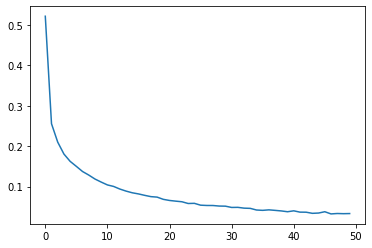

In [43]:
plt.plot(model.history.epoch,model.history.history['loss'])

In [44]:
model.history.params

{'batch_size': 32,
 'epochs': 50,
 'steps': 1313,
 'samples': 42000,
 'verbose': 1,
 'do_validation': False,
 'metrics': ['loss', 'accuracy']}